In [22]:
# reading the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

def happy():
    return pd.read_csv("raw_data/archive (2)/World Happiness Index by Reports 2013-2023 no nulls.csv")

def mac():
    return pd.read_csv("raw_data/big-mac-data-master/big-mac-data-master/output-data/big-mac-full-index.csv", parse_dates=['date'])


In [6]:
# explore happiness index

happy().head()

,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143
1,Afghanistan,2015,3.575,153
2,Afghanistan,2016,3.360,154
3,Afghanistan,2017,3.794,141
4,Afghanistan,2018,3.632,145


In [12]:
# read big mac data
mac().tail()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_bigmac,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
1626,2022-07-01,URY,UYU,Uruguay,255.00,41.91000,6.084467,0.18145,0.27689,0.37037,1.15086,0.71058,14726.863618,3.599789,0.49213,0.43239,0.58961,1.58970,0.73019
1627,2022-07-01,USA,USD,United States,5.15,1.00000,5.150000,0.00000,0.08078,0.15991,0.82053,0.44787,69231.400000,4.546401,0.00000,-0.04003,0.06533,0.73557,0.15955
1628,2022-07-01,VEN,VES,Venezuela,10.00,5.67320,1.762674,-0.65773,-0.63008,-0.60300,-0.37689,-0.50444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1629,2022-07-01,VNM,VND,Vietnam,69000.00,23417.00000,2.946577,-0.42785,-0.38163,-0.33636,0.04162,-0.17160,6375.564885,3.454747,-0.24706,-0.27720,-0.19787,0.30679,-0.12693
1630,2022-07-01,ZAF,ZAR,South Africa,39.90,17.03625,2.342065,-0.54523,-0.50849,-0.47251,-0.17208,-0.34155,13261.543640,3.574340,-0.42155,-0.44471,-0.38376,0.00394,-0.32926


In [25]:
#IPYNB GLOBALS

def extract_groups(collection):
    data = {}
    for name, group in collection:
        data[name] = group
    return data

asean =  {'Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand'}

In [18]:
# extract dates

def extract(df:pd.DataFrame, date_col:str):
    series = pd.to_datetime(df[date_col])
    

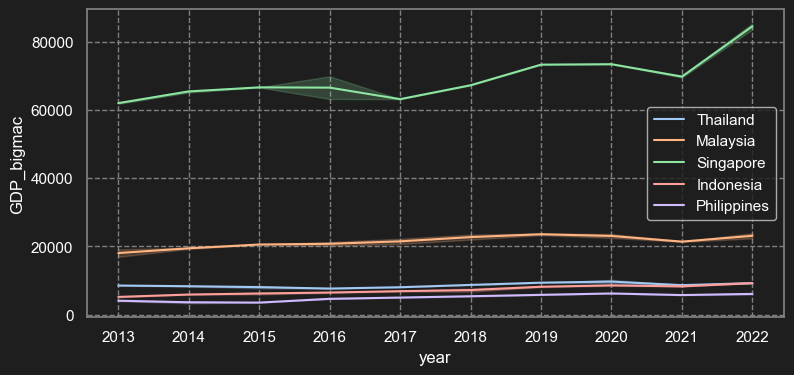

In [44]:
# group by extraction
grouped = mac().groupby("name")
mac_asean = {}


for country in asean:
    mac_asean[country] = grouped.get_group(country)

fig, ax = plt.subplots(figsize=(9, 4))
# drop duplicates
for key in mac_asean:
    value = mac_asean[key]
    value['year'] = value['date'].dt.year
    value = value[value.year >= 2013] 
    sns.lineplot(y=value.GDP_bigmac, x=value.year, label=key, ax=ax)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))  # set ticks to be every 1 unit
plt.show()

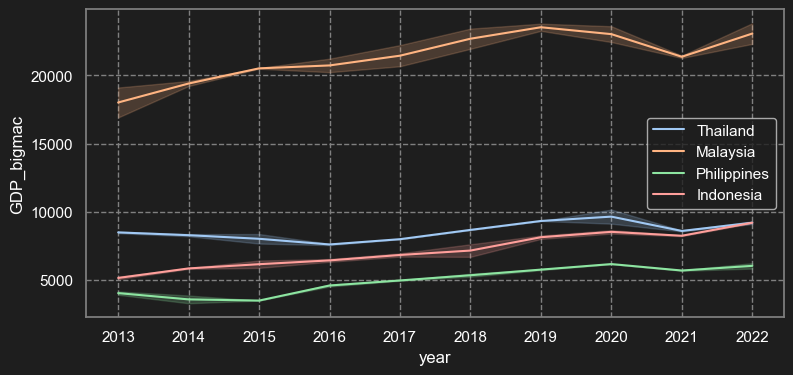

In [42]:
aseanNoLah =  {'Indonesia', 'Malaysia', 'Philippines', 'Thailand'}
# group by extraction
grouped = mac().groupby("name")
mac_asean = {}


for country in aseanNoLah:
    mac_asean[country] = grouped.get_group(country)

fig, ax = plt.subplots(figsize=(9, 4))
# drop duplicates
for key in mac_asean:
    value = mac_asean[key]
    value['year'] = value['date'].dt.year
    value = value[value.year >= 2013] 
    sns.lineplot(y=value.GDP_bigmac, x=value.year, label=key, ax=ax)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))  # set ticks to be every 1 unit
plt.show()

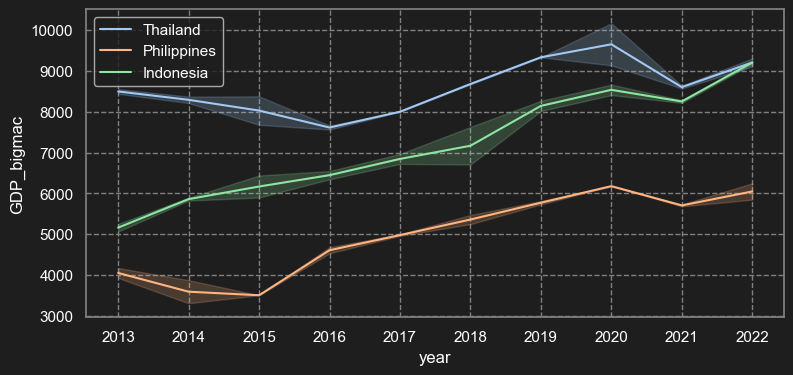

In [41]:
aseanNoMalay =  {'Indonesia', 'Philippines', 'Thailand'}
# group by extraction
grouped = mac().groupby("name")
mac_asean = {}


for country in aseanNoMalay:
    mac_asean[country] = grouped.get_group(country)

fig, ax = plt.subplots(figsize=(9, 4))
# drop duplicates
for key in mac_asean:
    value = mac_asean[key]
    value['year'] = value['date'].dt.year
    value = value[value.year >= 2013] 
    sns.lineplot(y=value.GDP_bigmac, x=value.year, label=key, ax=ax)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))  # set ticks to be every 1 unit
plt.show()

In [68]:
happy().head()

,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143
1,Afghanistan,2015,3.575,153
2,Afghanistan,2016,3.360,154
3,Afghanistan,2017,3.794,141
4,Afghanistan,2018,3.632,145


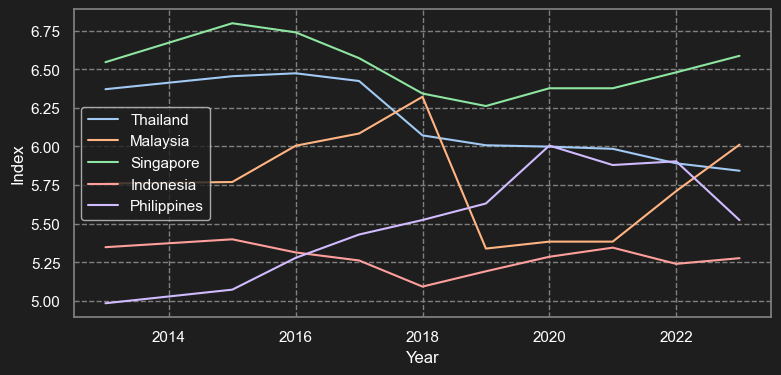

In [45]:
happy().head()
asean_happy = {}
test = None
grouped = happy().groupby('Country')
fig, ax = plt.subplots(figsize=(9, 4))
for country in asean:
    asean_happy[country] = grouped.get_group(country)

for key in asean_happy:
    value = asean_happy[key]
    sns.lineplot(x=value.Year, y=value.Index, label=key, ax=ax)

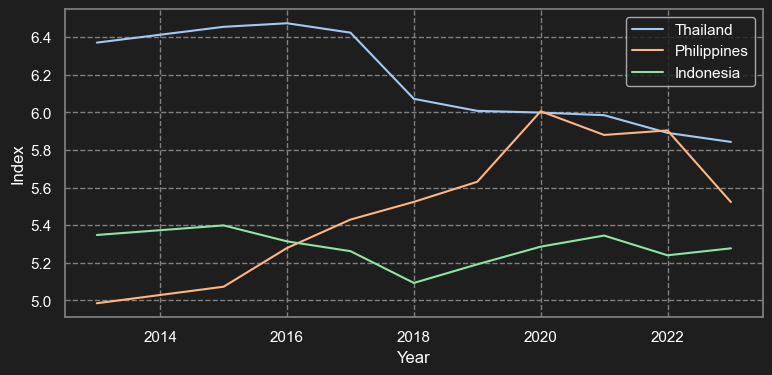

In [47]:
happy().head()
asean_happy = {}
test = None
grouped = happy().groupby('Country')
fig, ax = plt.subplots(figsize=(9, 4))
for country in aseanNoMalay:
    asean_happy[country] = grouped.get_group(country)

for key in asean_happy:
    value = asean_happy[key]
    sns.lineplot(x=value.Year, y=value.Index, label=key, ax=ax)

In [24]:
# Plot
new = mac()
new['year'] = pd.to_datetime(new['date'])


,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_bigmac,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted,year
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00000,2.500000,0.11607,0.05007,-0.16722,-0.09864,1.09091,7803.328512,1.922652,0.39117,NaN,-0.06626,0.10096,0.97153,2000-04-01
1,2000-04-01,AUS,AUD,Australia,2.59,1.68000,1.541667,-0.31176,-0.35246,-0.48645,-0.44416,0.28939,29144.876973,2.301550,-0.28335,NaN,-0.51898,-0.43285,0.01563,2000-04-01
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79000,1.648045,-0.26427,-0.30778,-0.45102,-0.40581,0.37836,4822.738983,1.869734,-0.05696,NaN,-0.36704,-0.25369,0.33645,2000-04-01
3,2000-04-01,CAN,CAD,Canada,2.85,1.47000,1.938776,-0.13448,-0.18566,-0.35417,-0.30099,0.62152,26087.329235,2.247266,-0.07698,NaN,-0.38047,-0.26953,0.30809,2000-04-01
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70000,3.470588,0.54937,0.45774,0.15609,0.25130,1.90267,23872.716095,2.207948,0.68172,NaN,0.12876,0.33090,1.38330,2000-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,2022-07-01,URY,UYU,Uruguay,255.00,41.91000,6.084467,0.18145,0.27689,0.37037,1.15086,0.71058,14726.863618,3.599789,0.49213,0.43239,0.58961,1.58970,0.73019,2022-07-01
1627,2022-07-01,USA,USD,United States,5.15,1.00000,5.150000,0.00000,0.08078,0.15991,0.82053,0.44787,69231.400000,4.546401,0.00000,-0.04003,0.06533,0.73557,0.15955,2022-07-01
1628,2022-07-01,VEN,VES,Venezuela,10.00,5.67320,1.762674,-0.65773,-0.63008,-0.60300,-0.37689,-0.50444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-01
1629,2022-07-01,VNM,VND,Vietnam,69000.00,23417.00000,2.946577,-0.42785,-0.38163,-0.33636,0.04162,-0.17160,6375.564885,3.454747,-0.24706,-0.27720,-0.19787,0.30679,-0.12693,2022-07-01


In [48]:
happy().head()

,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143
1,Afghanistan,2015,3.575,153
2,Afghanistan,2016,3.360,154
3,Afghanistan,2017,3.794,141
4,Afghanistan,2018,3.632,145


In [49]:
mac().head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_bigmac,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,0.11607,0.05007,-0.16722,-0.09864,1.09091,7803.328512,1.922652,0.39117,NaN,-0.06626,0.10096,0.97153
1,2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.31176,-0.35246,-0.48645,-0.44416,0.28939,29144.876973,2.301550,-0.28335,NaN,-0.51898,-0.43285,0.01563
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.26427,-0.30778,-0.45102,-0.40581,0.37836,4822.738983,1.869734,-0.05696,NaN,-0.36704,-0.25369,0.33645
3,2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.13448,-0.18566,-0.35417,-0.30099,0.62152,26087.329235,2.247266,-0.07698,NaN,-0.38047,-0.26953,0.30809
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.54937,0.45774,0.15609,0.25130,1.90267,23872.716095,2.207948,0.68172,NaN,0.12876,0.33090,1.38330


In [61]:
mcdo = mac()
mcdo.date.dtype

dtype('<M8[ns]')